In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score, f1_score, accuracy_score

Generate single molecule spectra for model training

In [2]:
k = np.arange(900, 1800, 5)

In [3]:
a=[]

for i in range(100):
    a.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(1+(np.random.rand()-0.5)*2*0.1) ) 

A = pd.DataFrame(np.column_stack((k, *a)))

In [4]:
b=[]

for i in range(100):
    b.append( norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(2+(np.random.rand()-0.5)*2*0.1) ) 

B = pd.DataFrame(np.column_stack((k, *b)))

In [5]:
c=[]

for i in range(100):
    c.append( norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(3+(np.random.rand()-0.5)*2*0.1) ) 

C = pd.DataFrame(np.column_stack((k, *c)))

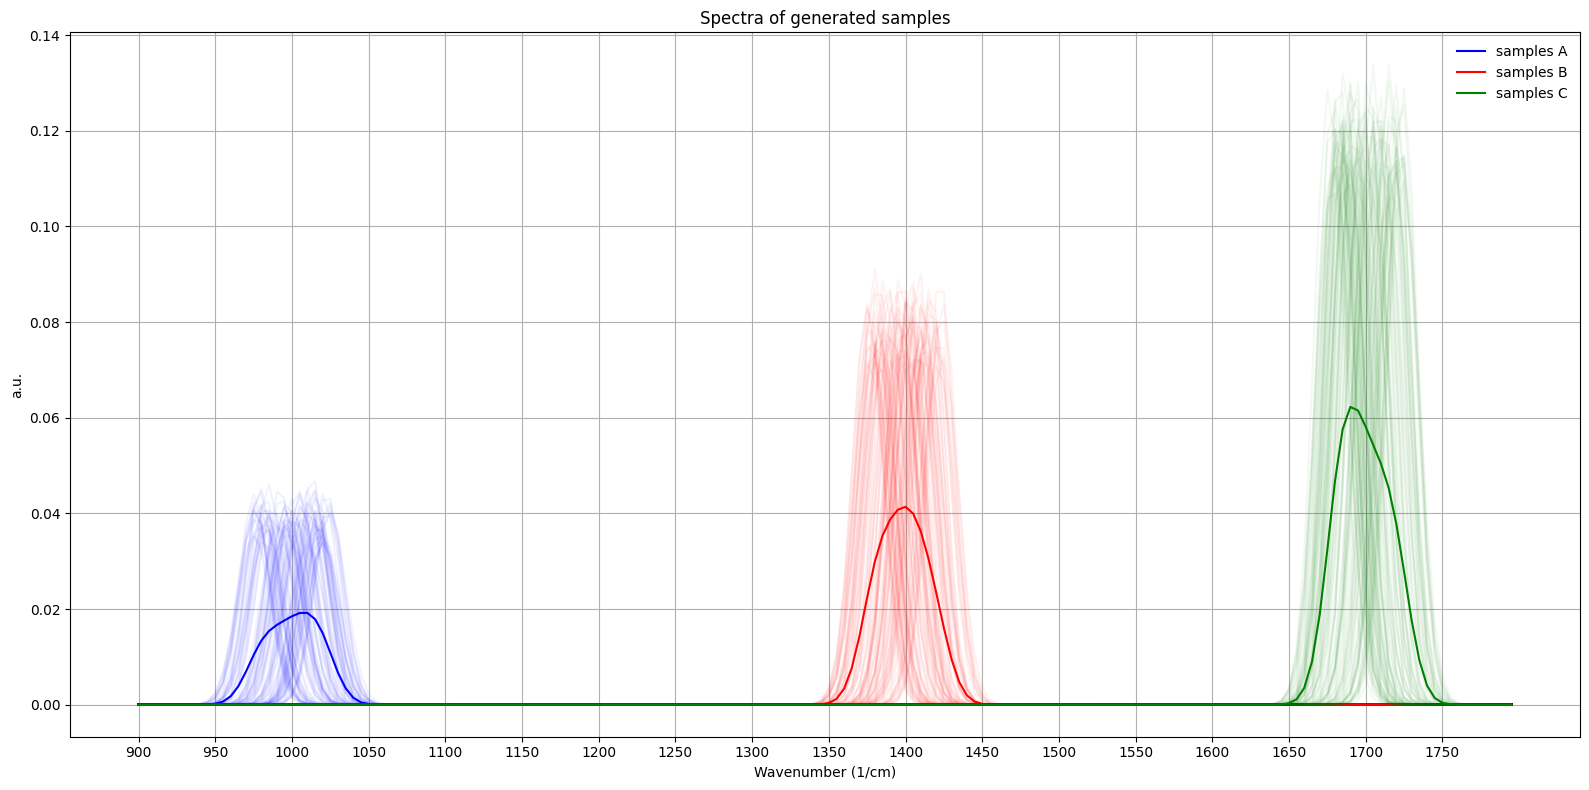

In [6]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
A_plot = pd.melt(A, [0])
for sample, measurement in A_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="samples A", legend=True
)
###
sample_measurement = []
B_plot = pd.melt(B, [0])
for sample, measurement in B_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="red")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="red", label="samples B", legend=True
)
###
sample_measurement = []
C_plot = pd.melt(C, [0])
for sample, measurement in C_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="green")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="green", label="samples C", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [7]:
A = A.set_index([0])
A.index.names = ['Wavenumbers']
A.columns = ['A_'+str(col) for col in A.columns]

B = B.set_index([0])
B.index.names = ['Wavenumbers']
B.columns = ['B_'+str(col) for col in B.columns]

C = C.set_index([0])
C.index.names = ['Wavenumbers']
C.columns = ['C_'+str(col) for col in C.columns]

df0 = pd.concat([A,B,C], axis=1)

In [8]:
df0

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,...,C_91,C_92,C_93,C_94,C_95,C_96,C_97,C_98,C_99,C_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,9.911843e-27,1.281907e-20,4.204948e-31,1.610273e-14,1.499654e-17,9.505964e-23,9.217827e-35,4.013461e-33,1.104120e-15,2.823193e-28,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
905.0,2.661997e-24,1.714591e-18,1.954063e-28,4.698343e-13,1.193572e-15,1.230692e-20,5.087089e-32,1.438549e-30,4.445727e-14,3.883064e-26,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
910.0,5.346431e-22,1.702613e-16,6.752588e-26,1.107523e-11,7.131702e-14,1.225501e-18,2.128405e-29,4.002861e-28,1.417820e-12,4.327315e-24,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
915.0,8.030151e-20,1.255226e-14,1.735224e-23,2.109227e-10,3.199078e-12,9.386185e-17,6.751241e-27,8.646819e-26,3.581388e-11,3.907261e-22,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
920.0,9.019589e-18,6.870358e-13,3.315847e-21,3.245313e-09,1.077317e-10,5.529366e-15,1.623518e-24,1.450048e-23,7.165287e-10,2.858488e-20,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.614183e-09,1.757310e-17,8.516544e-11,8.172309e-15,1.832895e-07,1.397698e-13,2.620537e-17,3.453625e-19,1.193623e-10,7.933924e-13
1780.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.225743e-11,2.365598e-19,2.095409e-12,1.341599e-16,1.521800e-08,3.740024e-15,2.870958e-19,2.542697e-21,5.651585e-12,2.750903e-14
1785.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.438984e-12,2.503500e-21,3.825077e-14,1.696692e-18,1.021106e-09,7.995306e-17,2.411287e-21,1.413168e-23,2.168107e-13,7.754658e-16


In [9]:
labels_train = pd.DataFrame(df0.columns).rename(columns={0:'sample'})
labels_train.loc[labels_train['sample'].str.contains('A'),'target'] = 'A'
labels_train.loc[labels_train['sample'].str.contains('B'),'target'] = 'B'
labels_train.loc[labels_train['sample'].str.contains('C'),'target'] = 'C'
labels_train = labels_train.set_index('sample')
labels_train


,target
sample,
A_1,A
A_2,A
A_3,A
A_4,A
A_5,A
...,...
C_96,C
C_97,C
C_98,C


Generate mixed molecule spectra for testing the model

In [10]:
F=[]
abc=[]

for i in range(100):
    Fa=(1+(np.random.rand()-0.5)*2*1)
    Fb=(2+(np.random.rand()-0.5)*2*2)
    Fc=(3+(np.random.rand()-0.5)*2*3)

    

    abc.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fa + \
                norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fb + \
                norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fc)

    F.append([Fa/1.,Fb/2.,Fc/3.])
    
    

In [11]:
ABC = pd.DataFrame(np.column_stack((k, *abc))).set_index([0])
ABC.index.names = ['Wavenumbers']
ABC.columns = ['ABC_'+str(col) for col in ABC.columns]

In [12]:
ABC

,ABC_1,ABC_2,ABC_3,ABC_4,ABC_5,ABC_6,ABC_7,ABC_8,ABC_9,ABC_10,...,ABC_91,ABC_92,ABC_93,ABC_94,ABC_95,ABC_96,ABC_97,ABC_98,ABC_99,ABC_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,2.876857e-24,3.836682e-35,2.733810e-20,2.322019e-21,5.228197e-34,5.175158e-29,2.263362e-28,1.295086e-30,4.621175e-27,2.843045e-16,...,1.578430e-30,2.624106e-19,4.419959e-21,1.191388e-33,1.685721e-27,2.596344e-16,4.226403e-25,1.555547e-17,5.598393e-29,2.741651e-22
905.0,3.070780e-22,1.692208e-32,2.874233e-18,2.080294e-19,3.383993e-31,1.783408e-26,4.546441e-26,2.916017e-28,7.188421e-25,1.382030e-14,...,3.111302e-28,1.845477e-17,5.323243e-19,3.868169e-31,3.260469e-25,1.208494e-14,8.927239e-23,1.090225e-15,1.515820e-26,2.352977e-20
910.0,2.604746e-20,5.792242e-30,2.304329e-16,1.440513e-17,1.625633e-28,4.603475e-24,7.169437e-24,5.203033e-26,8.881575e-23,5.254322e-13,...,4.876973e-26,1.023305e-15,4.871213e-17,9.889737e-29,4.926970e-23,4.421491e-13,1.411633e-20,5.789051e-14,3.147204e-24,1.614391e-18
915.0,1.755773e-18,1.538633e-27,1.408756e-14,7.709797e-16,5.796040e-26,8.900805e-22,8.875534e-22,7.356952e-24,8.716092e-21,1.562361e-11,...,6.079246e-24,4.473738e-14,3.386888e-15,1.991091e-26,5.816814e-21,1.271555e-11,1.671031e-18,2.328929e-12,5.010659e-22,8.854939e-17
920.0,9.404977e-17,3.171895e-25,6.567437e-13,3.189349e-14,1.533755e-23,1.289083e-19,8.625809e-20,8.243548e-22,6.794054e-19,3.633388e-10,...,6.026157e-22,1.542074e-12,1.789235e-13,3.156638e-24,5.365325e-19,2.874379e-10,1.480831e-16,7.098441e-11,6.117273e-20,3.882826e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,1.993530e-07,2.014518e-13,2.197838e-12,4.255264e-09,1.565366e-19,2.883748e-12,1.290716e-24,6.250490e-16,1.361086e-13,7.978471e-14,...,8.141543e-12,3.557700e-11,2.743179e-22,8.627866e-11,5.201964e-26,6.225587e-12,6.270102e-19,7.488627e-09,1.442082e-20,9.453895e-20
1780.0,1.651753e-08,5.904824e-15,3.862504e-14,1.851666e-10,9.166463e-22,7.838166e-14,6.561174e-27,6.467435e-18,2.219364e-15,1.819739e-15,...,2.469349e-13,9.541880e-13,1.811529e-24,2.839984e-12,1.563742e-28,1.670508e-13,4.472175e-21,3.252228e-10,1.260839e-22,6.895700e-22
1785.0,1.091555e-09,1.388119e-16,4.999718e-16,6.220447e-12,3.985583e-24,1.668280e-15,2.507862e-29,4.990526e-20,2.708695e-17,3.283130e-17,...,5.867045e-15,1.917149e-14,9.266975e-27,7.279200e-14,3.530683e-31,3.426885e-15,2.398151e-23,1.068529e-11,8.635963e-25,3.825576e-24


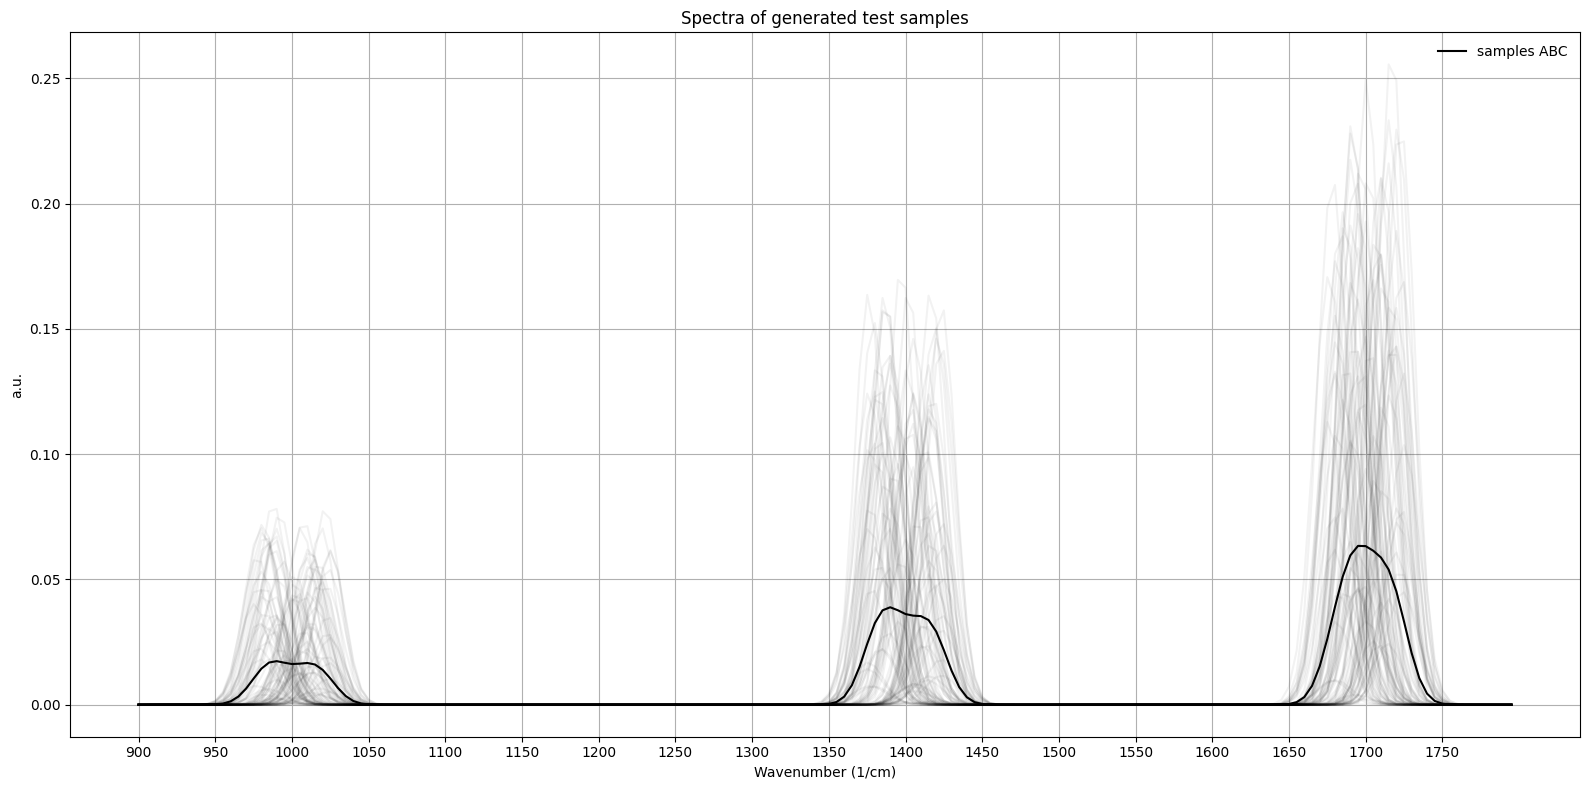

In [13]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
ABC_plot = pd.melt(ABC.reset_index(), ['Wavenumbers'])
for sample, measurement in ABC_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="black")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="black", label="samples ABC", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated test samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [14]:
df1=ABC.copy()

In [15]:
labels = pd.DataFrame(F).rename(columns={0:'A', 1:'B', 2:'C'})
labels.index = ['ABC_'+str(row+1) for row in labels.index]
labels

,A,B,C
ABC_1,0.325036,0.801921,0.468623
ABC_2,1.185296,0.943113,0.577774
ABC_3,1.596884,0.609085,0.907196
ABC_4,0.060767,0.010763,1.326510
ABC_5,1.034830,1.552657,1.782243
...,...,...,...
ABC_96,0.936456,0.014294,0.327944
ABC_97,0.458708,0.101325,1.708618
ABC_98,0.432001,0.905613,0.580155
ABC_99,1.057750,0.213471,1.125363


Now we have:

+ the single molecule spectra `df0` 
+ the mixed molecule spectra `df1`
+ `labels` with the mixing ratios of the mixed molecule spectra



### Next step: 
Find an ML model that determines the right molecular mixing ratios from the mixed molecule spectra. 

In [23]:
X_train = df0.copy().T
X_test = df1.copy().T
y_train=labels_train.copy()

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)


/home/karol/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [94]:
y_pred = model.predict_proba(X_test)

sample_num = 97


In [95]:
y_pred[sample_num]

array([0.24934979, 0.44883592, 0.30181429])

In [96]:
indiv_heights = [df0.filter(like='A_').max().mean(), 
                 df0.filter(like='B_').max().mean(), 
                 df0.filter(like='C_').max().mean()]
indiv_heights = np.array(indiv_heights)

predicted_heights = y_pred[sample_num]*indiv_heights

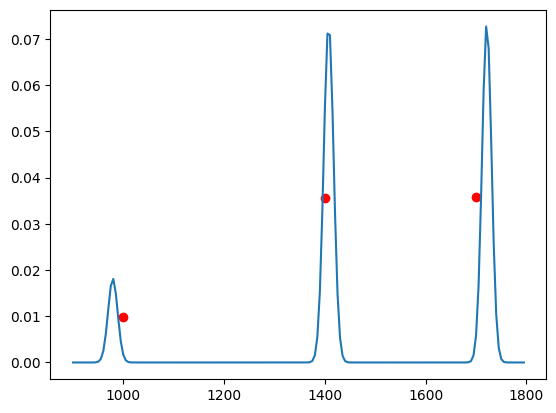

In [97]:
k = list(df0.index.unique())
plt.plot(k, np.array(X_test)[sample_num])
plt.scatter([1000,1400,1700], predicted_heights, color='red')
plt.show()

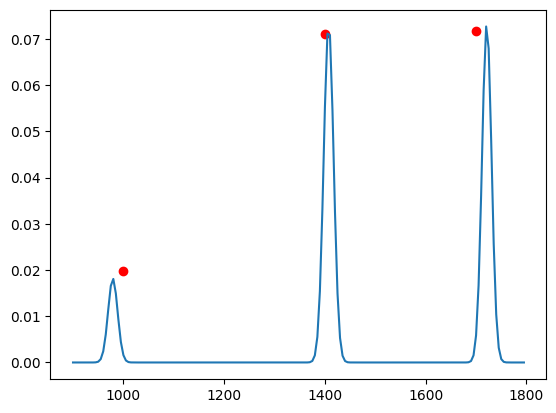

In [98]:
plt.plot(k, np.array(X_test)[sample_num])
plt.scatter([1000,1400,1700], predicted_heights*2.0, color='red')
plt.show()

Logistic regression as actually a good start

### Testing a CNN

In [99]:
# importing the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, MaxPooling1D, MaxPooling2D, Activation, Flatten, BatchNormalization, Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

from tensorflow.keras.optimizers import Adam

2024-02-08 16:11:19.245941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 16:11:19.246000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 16:11:19.247082: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 16:11:19.254046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 16:11:20.440369: W tensorflow/compiler/tf2

In [100]:
xtrain = np.array(df0.T)
xtrain = xtrain.reshape(300,180,1)

xtest = np.array(df1.T)
xtest = xtest.reshape(100,180,1)

ytrain = np.array(labels_train)
mapping = {'A': 0, 'B': 1, 'C': 2}
ytrain = to_categorical(np.asarray([mapping[x[0]] for x in ytrain]).astype(int))


ytest = np.array(labels)

In [101]:
from tensorflow.keras import backend as K
K.clear_session() 
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(180, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  

])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [102]:
model.fit(xtrain, ytrain, epochs=200, batch_size=128,validation_split=0.3, verbose=0)

In [103]:
pred = model.predict(xtest)

4/4 [==============================] - 0s 5ms/step


In [108]:
sample_num = 97



indiv_heights = [df0.filter(like='A_').max().mean(), 
                 df0.filter(like='B_').max().mean(), 
                 df0.filter(like='C_').max().mean()]
indiv_heights = np.array(indiv_heights)

predicted_heights = pred[sample_num]*indiv_heights


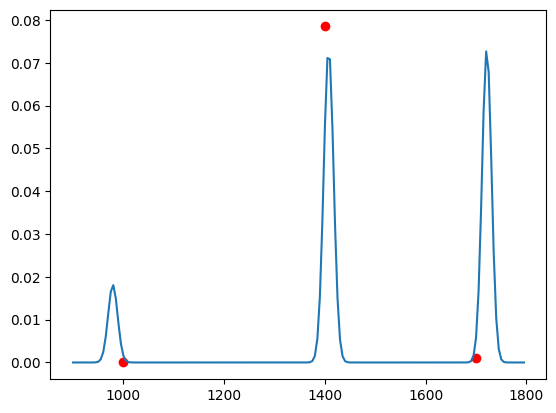

In [109]:
k = list(df0.index.unique())
plt.plot(k, np.array(xtest)[sample_num])
plt.scatter([1000,1400,1700], predicted_heights, color='red')
plt.show()

problems: Imbalanced data, biasing during training